# Generated data analysis

This notebook serves as a basic to tool to run some exploratory data analysis on the dataset generated by running the scraper bots.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data loading

In [2]:
# dataset path
dataset_path = '../data/output.csv'

In [4]:
# check to see if the data is in the correct directory
try:
    df = pd.read_csv(dataset_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the path and try again.")
    print("If no file is present, please run the main.py script.")

Data loaded successfully.


## Visualization

In [21]:
# remove any NaN values from the "company_name", "job_type", "location", "actively_recruiting" and "easy_apply" columns
df = df.dropna(subset=['company_name', 'job_type', 'location', 'actively_recruiting', 'easy_apply'])

In [22]:
# get the unique values for each of the "company_name", "job_type", "location", "actively_recruiting" and "easy_apply" columns
company_names = df['company_name'].unique()
job_types = df['job_type'].unique()
locations = df['location'].unique()
actively_recruiting = df['actively_recruiting'].unique()
easy_apply = df['easy_apply'].unique()

In [29]:
print("Number of jobs scrapped: ", len(df))

print("Number of companies: ", len(company_names))
print("Job types: ", job_types)
print("Number of Locations: ", len(locations))

Number of jobs scrapped:  502
Number of companies:  318
Job types:  ['On-site' 'Remote' 'Hybrid']
Number of Locations:  221


### Companies

In [24]:
# get the average number of jobs per company
avg_jobs_per_company = df.groupby('company_name')['job_type'].count().mean()

print("Average number of jobs per company: ", avg_jobs_per_company)

Average number of jobs per company:  1.578616352201258


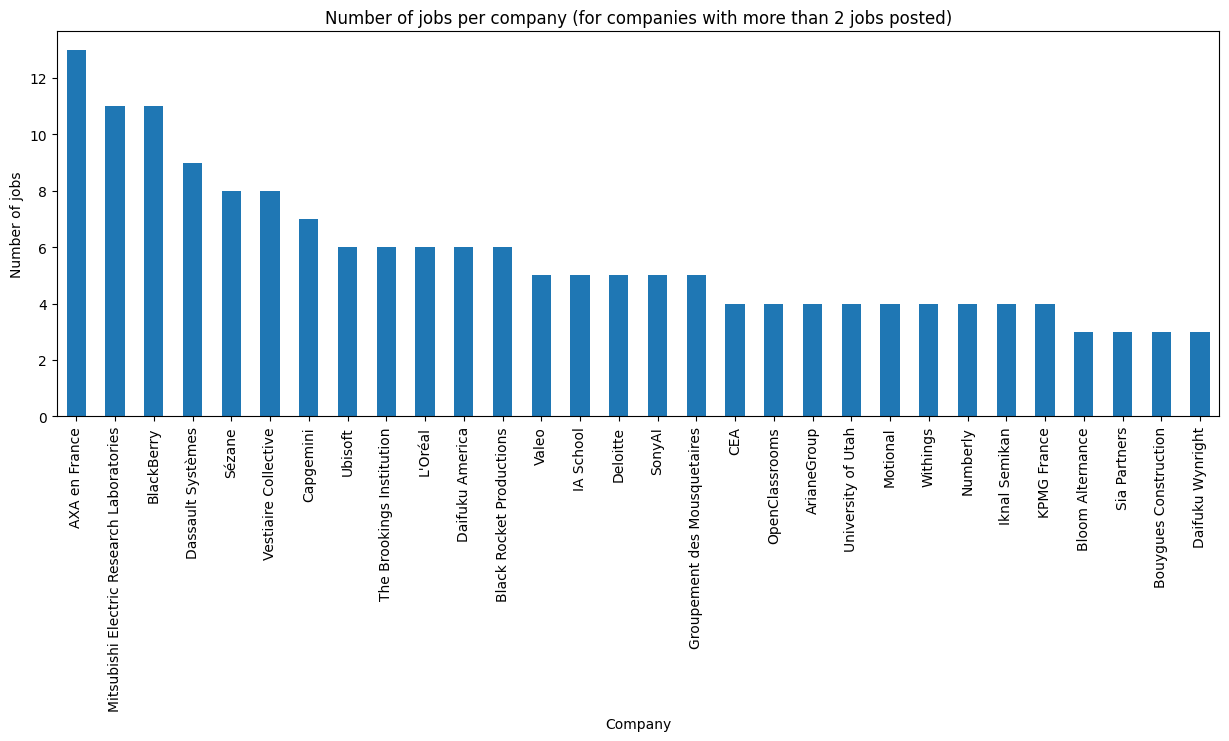

In [42]:
# plot the number of jobs per company for companies with more than 2 jobs posted
df.groupby('company_name')['job_type'].count().sort_values(ascending=False).head(30).plot(kind='bar', figsize=(15, 5))
plt.title("Number of jobs per company (for companies with more than 2 jobs posted)")
plt.xlabel("Company")
plt.ylabel("Number of jobs")
plt.show()

### Job types

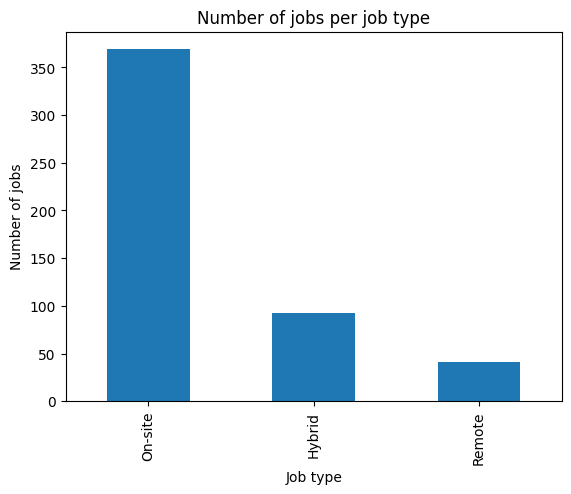

In [26]:
# plot the number of jobs per job type
df.groupby('job_type')['company_name'].count().sort_values(ascending=False).plot(kind='bar')
plt.title("Number of jobs per job type")
plt.xlabel("Job type")
plt.ylabel("Number of jobs")
plt.show()

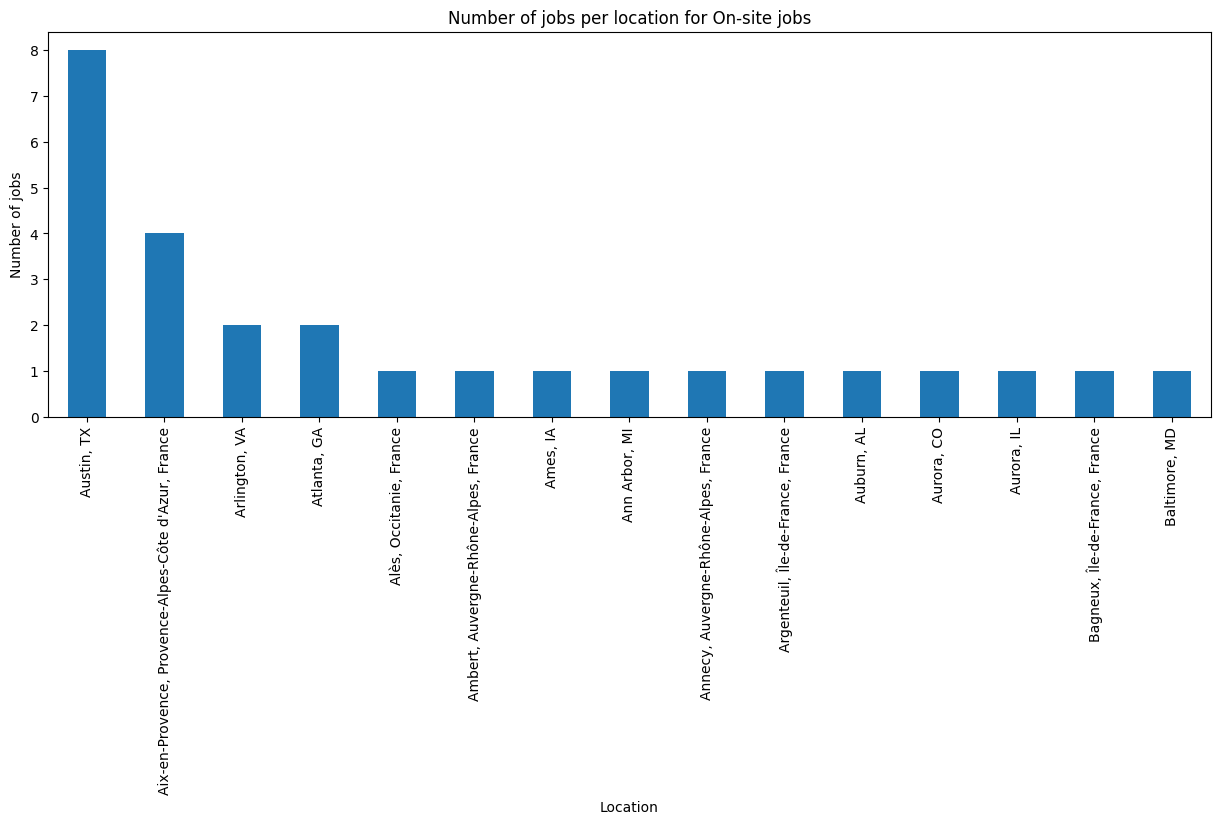

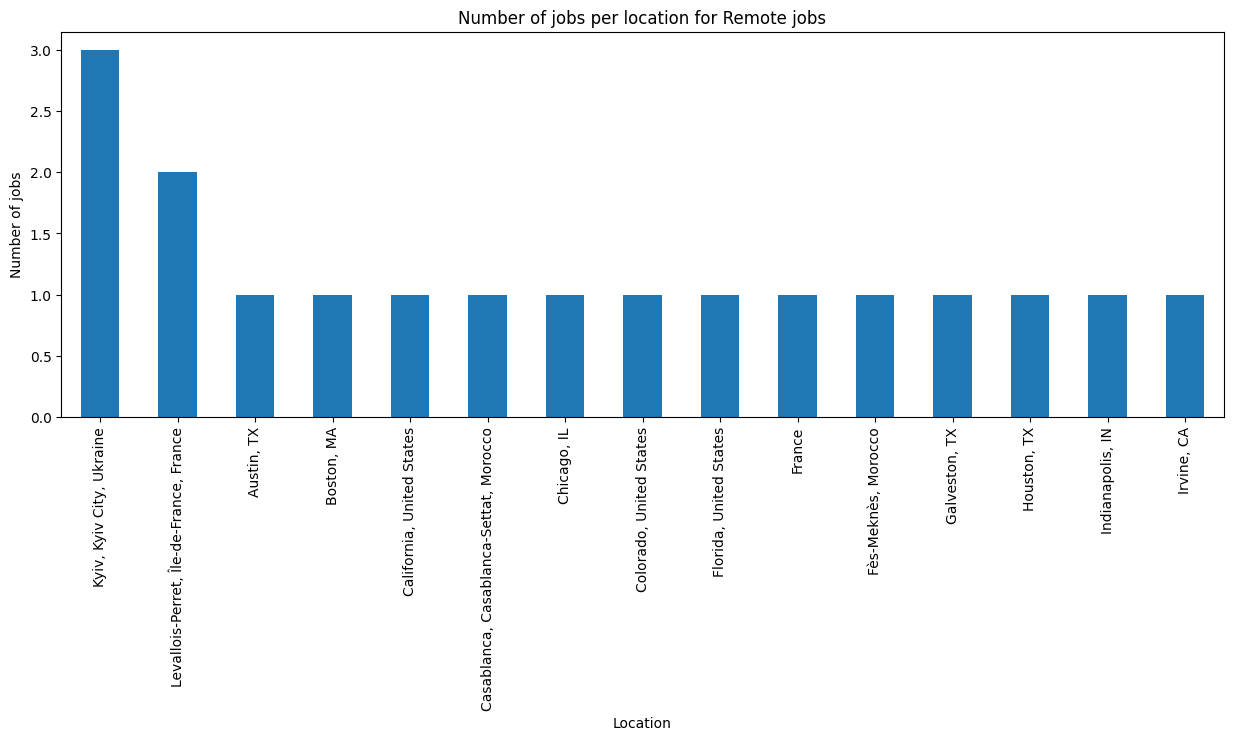

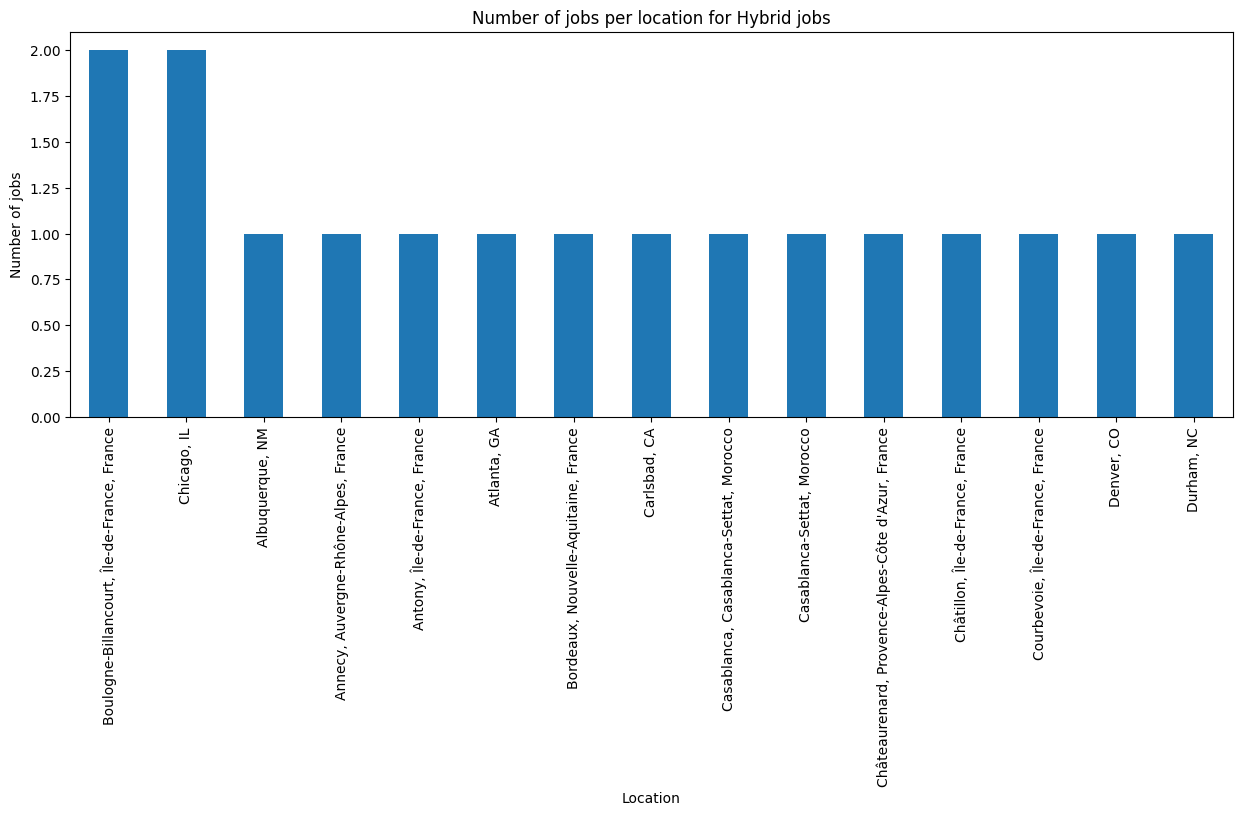

In [27]:
# plot the number of job per location for each job type
# Make the figure wider to see the x-axis labels better
for job_type in job_types:
    df[df['job_type'] == job_type].groupby('location')['company_name'].count().head(15).sort_values(ascending=False).plot(kind='bar', figsize=(15, 5))
    plt.title("Number of jobs per location for " + job_type + " jobs")
    plt.xlabel("Location")
    plt.ylabel("Number of jobs")
    plt.show()

### Easy-apply

In [32]:
# print the number of jobs that have the "easy_apply" feature
print("Number of jobs with the 'easy_apply' feature: ", len(df[df['easy_apply'] == True]))
print(f"That's {round(len(df[df['easy_apply'] == True]) / len(df) * 100, 2)}% of all jobs.")

Number of jobs with the 'easy_apply' feature:  103
That's 20.52% of all jobs.


<Axes: xlabel='easy_apply'>

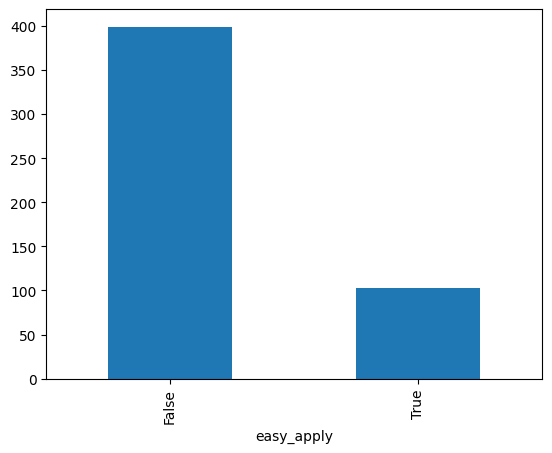

In [33]:
# plot the number of jobs that have the "easy_apply" feature
df.groupby('easy_apply')['company_name'].count().sort_values(ascending=False).plot(kind='bar')

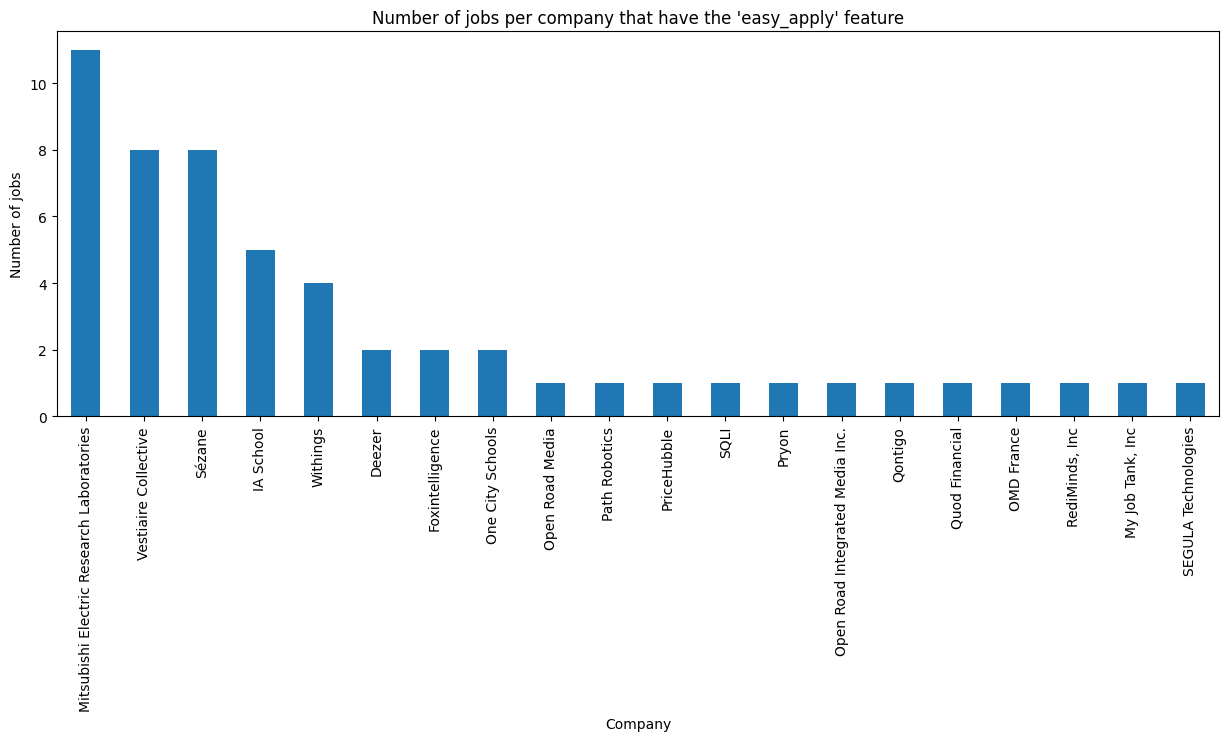

In [39]:
# plot the 20 companies that have the most jobs with the "easy_apply" feature
df[df['easy_apply'] == True].groupby('company_name')['job_type'].count().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(15, 5))
plt.title("Number of jobs per company that have the 'easy_apply' feature")
plt.xlabel("Company")
plt.ylabel("Number of jobs")
plt.show()

### Actively recruiting

In [35]:
# print the number of jobs that are actively recruiting
print("Number of jobs that are actively recruiting: ", len(df[df['actively_recruiting'] == True]))
print(f"That's {round(len(df[df['actively_recruiting'] == True]) / len(df) * 100, 2)}% of all jobs.")

Number of jobs that are actively recruiting:  303
That's 60.36% of all jobs.


<Axes: xlabel='actively_recruiting'>

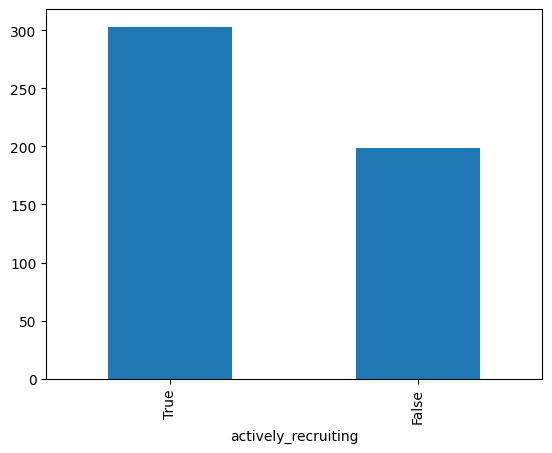

In [36]:
# plot the number of jobs that are actively recruiting
df.groupby('actively_recruiting')['company_name'].count().sort_values(ascending=False).plot(kind='bar')

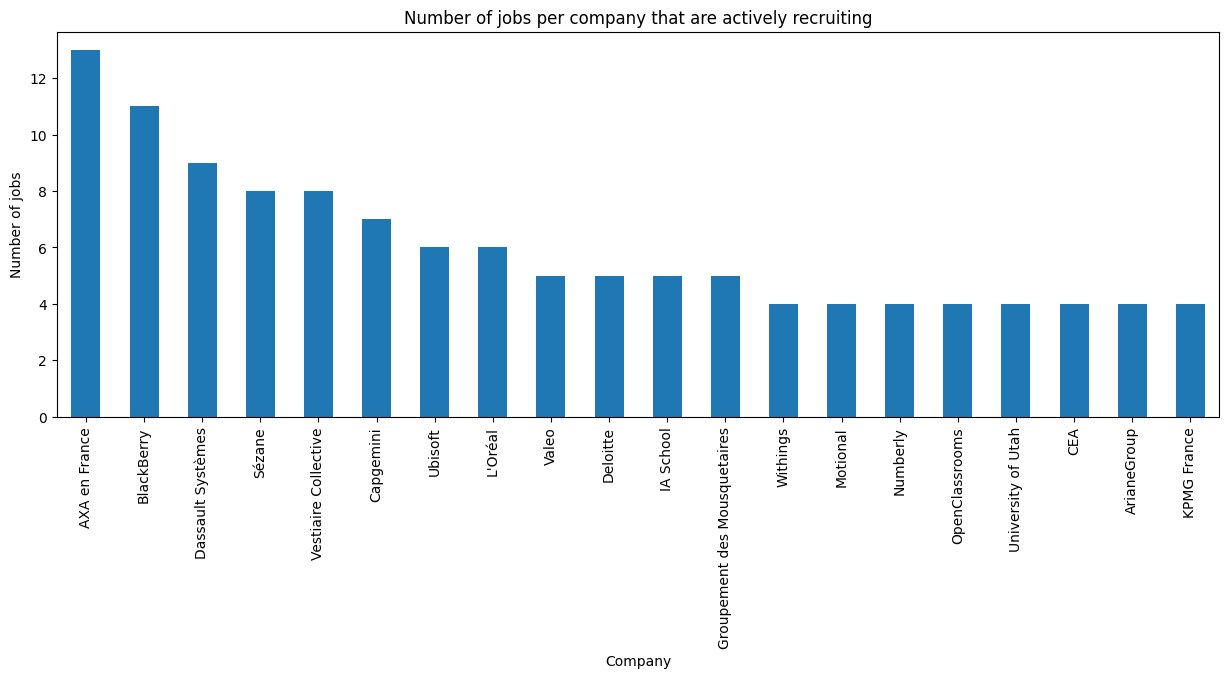

In [40]:
# plot the 20 first companies that are the most actively recruiting
df[df['actively_recruiting'] == True].groupby('company_name')['job_type'].count().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(15, 5))
plt.title("Number of jobs per company that are actively recruiting")
plt.xlabel("Company")
plt.ylabel("Number of jobs")
plt.show()